In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# loading data
csvpath = Path("C:\\Users\\willu\\Documents\\NBA-ML-Project\\combined_df.csv")
teamstats_df = pd.read_csv(csvpath)
pd.set_option("display.max_columns", 110)

In [3]:
teamstats_df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12738 entries, 0 to 12737
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12738 non-null  int64  
 1   H_TEAM      12738 non-null  object 
 2   H_TEAM1     12738 non-null  object 
 3   H_H/A       12738 non-null  object 
 4   H_TEAM2     12738 non-null  object 
 5   GAMEDATE    12738 non-null  object 
 6   H_W/L       12738 non-null  object 
 7   H_MIN       12738 non-null  int64  
 8   H_PTS       12738 non-null  int64  
 9   H_FGM       12738 non-null  int64  
 10  H_FGA       12738 non-null  int64  
 11  H_FG%       12738 non-null  float64
 12  H_3PM       12738 non-null  int64  
 13  H_3PA       12738 non-null  int64  
 14  H_3P%       12738 non-null  float64
 15  H_FTM       12738 non-null  int64  
 16  H_FTA       12738 non-null  int64  
 17  H_FT%       12738 non-null  float64
 18  H_OREB      12738 non-null  int64  
 19  H_DREB      12738 non-nul

In [4]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['H_TEAM1', 'H_TEAM2', 'A_TEAM1','A_TEAM2', 'GAMEDATE','GAMEDATE.1','A_W/L', 'A_+/-','H_+/-','H_PTS','A_PTS'])

In [5]:
# converting 'H/A' to 0/1's
teamstats_df['H_H/A'] = teamstats_df['H_H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df['A_H/A'] = teamstats_df['A_H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df[:5]

,Unnamed: 0,H_TEAM,H_H/A,H_W/L,H_MIN,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,A_TEAM,A_H/A,A_MIN,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF
0,0,ATL,1,W,53,42,92,45.7,14,28,50.0,16,27,59.3,11,35,46,25,12,6,6,21,SAS,0,53,42,90,46.7,9,27,33.3,19,22,86.4,9,38,47,27,12,5,6,21
1,1,ATL,1,L,48,37,80,46.3,10,31,32.3,16,19,84.2,7,34,41,23,20,15,4,19,GSW,0,48,39,87,44.8,6,27,22.2,17,25,68.0,13,34,47,30,21,15,7,17
2,2,ATL,1,W,48,42,82,51.2,10,32,31.3,22,24,91.7,4,36,40,22,14,8,4,28,IND,0,48,36,87,41.4,10,27,37.0,29,35,82.9,13,26,39,24,11,8,4,24
3,3,ATL,1,L,63,36,94,38.3,6,22,27.3,31,46,67.4,15,36,51,22,19,10,5,24,MIA,0,63,45,102,44.1,8,28,28.6,18,23,78.3,14,42,56,25,22,6,6,35
4,4,ATL,1,L,48,28,68,41.2,10,29,34.5,15,19,78.9,8,28,36,18,21,8,4,19,BOS,0,48,39,85,45.9,3,16,18.8,8,12,66.7,16,28,44,27,13,11,4,15


In [6]:
# converting 'W/L' to 0/1's
teamstats_df['H_W/L']=teamstats_df['H_W/L'].apply(lambda x: 1 if x=="W" else 0)
# teamstats_df['A_W/L']=teamstats_df['A_W/L'].apply(lambda x: 1 if x=="W" else 0)
teamstats_df[:5]

,Unnamed: 0,H_TEAM,H_H/A,H_W/L,H_MIN,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,A_TEAM,A_H/A,A_MIN,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF
0,0,ATL,1,1,53,42,92,45.7,14,28,50.0,16,27,59.3,11,35,46,25,12,6,6,21,SAS,0,53,42,90,46.7,9,27,33.3,19,22,86.4,9,38,47,27,12,5,6,21
1,1,ATL,1,0,48,37,80,46.3,10,31,32.3,16,19,84.2,7,34,41,23,20,15,4,19,GSW,0,48,39,87,44.8,6,27,22.2,17,25,68.0,13,34,47,30,21,15,7,17
2,2,ATL,1,1,48,42,82,51.2,10,32,31.3,22,24,91.7,4,36,40,22,14,8,4,28,IND,0,48,36,87,41.4,10,27,37.0,29,35,82.9,13,26,39,24,11,8,4,24
3,3,ATL,1,0,63,36,94,38.3,6,22,27.3,31,46,67.4,15,36,51,22,19,10,5,24,MIA,0,63,45,102,44.1,8,28,28.6,18,23,78.3,14,42,56,25,22,6,6,35
4,4,ATL,1,0,48,28,68,41.2,10,29,34.5,15,19,78.9,8,28,36,18,21,8,4,19,BOS,0,48,39,85,45.9,3,16,18.8,8,12,66.7,16,28,44,27,13,11,4,15


In [7]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
#teamstats_df = teamstats_df.drop(columns=['H_TEAM1','H_TEAM2','A_TEAM1','A_TEAM2'])

In [36]:
# new_teamstats_df = pd.get_dummies(teamstats_df, columns=['H_TEAM','A_TEAM'])


In [37]:
# new_teamstats_df

In [10]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop(['H_W/L', 'H_TEAM','A_TEAM'], axis=1, inplace=True)
X.head(16)

,Unnamed: 0,H_H/A,H_MIN,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,A_H/A,A_MIN,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF
0,0,1,53,42,92,45.7,14,28,50.0,16,27,59.3,11,35,46,25,12,6,6,21,0,53,42,90,46.7,9,27,33.3,19,22,86.4,9,38,47,27,12,5,6,21
1,1,1,48,37,80,46.3,10,31,32.3,16,19,84.2,7,34,41,23,20,15,4,19,0,48,39,87,44.8,6,27,22.2,17,25,68.0,13,34,47,30,21,15,7,17
2,2,1,48,42,82,51.2,10,32,31.3,22,24,91.7,4,36,40,22,14,8,4,28,0,48,36,87,41.4,10,27,37.0,29,35,82.9,13,26,39,24,11,8,4,24
3,3,1,63,36,94,38.3,6,22,27.3,31,46,67.4,15,36,51,22,19,10,5,24,0,63,45,102,44.1,8,28,28.6,18,23,78.3,14,42,56,25,22,6,6,35
4,4,1,48,28,68,41.2,10,29,34.5,15,19,78.9,8,28,36,18,21,8,4,19,0,48,39,85,45.9,3,16,18.8,8,12,66.7,16,28,44,27,13,11,4,15
5,5,1,48,37,87,42.5,15,39,38.5,12,19,63.2,14,27,41,22,13,3,4,24,0,48,40,84,47.6,5,18,27.8,22,24,91.7,11,35,46,20,9,7,6,20
6,6,1,48,43,91,47.3,10,24,41.7,10,13,76.9,14,45,59,25,17,7,2,22,0,48,31,87,35.6,5,34,14.7,15,27,55.6,12,29,41,23,14,11,7,17
7,7,1,48,35,77,45.5,18,39,46.2,27,32,84.4,4,30,34,24,10,3,5,22,0,48,47,92,51.1,9,27,33.3,20,27,74.1,7,34,41,27,4,4,6,23
8,8,1,48,47,83,56.6,9,12,75.0,6,6,100.0,4,27,31,32,14,16,8,16,0,48,36,82,43.9,6,14,42.9,16,20,80.0,17,26,43,21,20,8,5,9
9,9,1,48,32,72,44.4,13,25,52.0,19,23,82.6,8,29,37,21,18,17,4,15,0,48,35,79,44.3,5,17,29.4,11,11,100.0,8,31,39,20,21,10,4,21


In [11]:
teamstats_df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12738 entries, 0 to 12737
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12738 non-null  int64  
 1   H_TEAM      12738 non-null  object 
 2   H_H/A       12738 non-null  int64  
 3   H_W/L       12738 non-null  int64  
 4   H_MIN       12738 non-null  int64  
 5   H_FGM       12738 non-null  int64  
 6   H_FGA       12738 non-null  int64  
 7   H_FG%       12738 non-null  float64
 8   H_3PM       12738 non-null  int64  
 9   H_3PA       12738 non-null  int64  
 10  H_3P%       12738 non-null  float64
 11  H_FTM       12738 non-null  int64  
 12  H_FTA       12738 non-null  int64  
 13  H_FT%       12738 non-null  float64
 14  H_OREB      12738 non-null  int64  
 15  H_DREB      12738 non-null  int64  
 16  H_REB       12738 non-null  int64  
 17  H_AST       12738 non-null  int64  
 18  H_TOV       12738 non-null  int64  
 19  H_STL       12738 non-nul

In [12]:
# defining target vector
#y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
y=teamstats_df['H_W/L'].ravel()
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [13]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [15]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=30, random_state=78)

In [17]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
#rf_model = rf_model.fit(X_train_scaled, y_train)

In [18]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
#predictions = rf_model.predict(X_test_scaled)

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1173,173
Actual 1,146,1693


Accuracy Score : 0.8998430141287285
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1346
           1       0.91      0.92      0.91      1839

    accuracy                           0.90      3185
   macro avg       0.90      0.90      0.90      3185
weighted avg       0.90      0.90      0.90      3185



In [21]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [22]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.11986457397057483, 'A_FG%'),
 (0.11362186901408454, 'H_FG%'),
 (0.0687534567929555, 'A_FGM'),
 (0.06657317444017688, 'H_FGM'),
 (0.045087465842302686, 'H_3P%'),
 (0.03910288428030691, 'A_3P%'),
 (0.03192733507139974, 'A_REB'),
 (0.03079538309122088, 'H_FTM'),
 (0.030478980162118176, 'A_DREB'),
 (0.0288457521994432, 'A_FTM'),
 (0.026993200452852053, 'H_DREB'),
 (0.025477453546208097, 'H_FTA'),
 (0.02528331322900821, 'H_REB'),
 (0.023941632316635222, 'H_AST'),
 (0.02138706180790806, 'A_PF'),
 (0.020590493336611036, 'A_AST'),
 (0.02033925725142481, 'A_TOV'),
 (0.020274016328723134, 'A_FTA'),
 (0.01994907271577774, 'H_TOV'),
 (0.018923322284454116, 'H_PF'),
 (0.01809837775516532, 'A_3PM'),
 (0.017704637584570197, 'H_FT%'),
 (0.01612376141113162, 'H_STL'),
 (0.016114963931906236, 'A_FT%'),
 (0.01554390097785925, 'H_3PM'),
 (0.014748492324308611, 'A_STL'),
 (0.013516112312220167, 'Unnamed: 0'),
 (0.012539815589303999, 'H_FGA'),
 (0.01202197018654727, 'A_3PA'),
 (0.01185977982939793, 'A_F

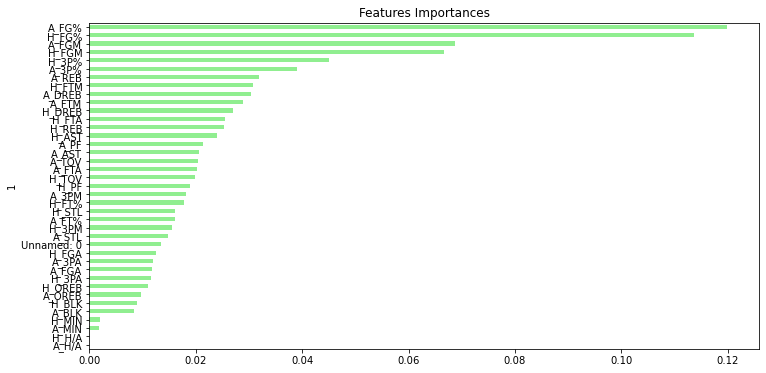

In [23]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize=(12,6))

In [24]:
X_test

,Unnamed: 0,H_H/A,H_MIN,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,H_FTA,H_FT%,H_OREB,H_DREB,H_REB,H_AST,H_TOV,H_STL,H_BLK,H_PF,A_H/A,A_MIN,A_FGM,A_FGA,A_FG%,A_3PM,A_3PA,A_3P%,A_FTM,A_FTA,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF
8141,8141,1,48,47,86,54.7,19,43,44.2,7,13,53.8,15,37,52,34,17,8,1,19,0,48,32,76,42.1,6,21,28.6,11,15,73.3,5,25,30,14,19,8,2,15
4953,4953,1,48,38,81,46.9,9,22,40.9,23,31,74.2,7,42,49,20,18,5,11,27,0,48,34,82,41.5,6,13,46.2,25,34,73.5,4,34,38,21,15,5,3,25
9212,9212,1,48,31,81,38.3,8,29,27.6,15,23,65.2,11,35,46,13,16,10,5,20,0,48,47,98,48.0,14,34,41.2,17,18,94.4,14,40,54,31,11,10,4,19
4768,4768,1,48,36,79,45.6,7,20,35.0,13,15,86.7,3,41,44,26,14,10,6,12,0,48,35,85,41.2,4,16,25.0,10,14,71.4,9,38,47,15,16,7,0,16
11987,11987,1,48,36,74,48.6,10,25,40.0,12,19,63.2,10,31,41,23,12,9,1,25,0,48,29,67,43.3,7,23,30.4,24,30,80.0,5,27,32,19,10,8,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6107,6107,1,48,36,80,45.0,11,24,45.8,19,27,70.4,11,34,45,19,13,6,11,25,0,48,36,86,41.9,6,18,33.3,20,29,69.0,15,30,45,20,11,6,5,23
5750,5750,1,48,46,85,54.1,9,20,45.0,18,28,64.3,9,32,41,27,13,10,3,15,0,48,44,90,48.9,9,23,39.1,11,18,61.1,11,31,42,30,15,8,1,22
114,114,1,48,31,78,39.7,7,17,41.2,14,20,70.0,11,36,47,19,18,8,4,12,0,48,31,82,37.8,7,32,21.9,9,13,69.2,10,30,40,19,15,12,8,19
10892,10892,1,48,38,87,43.7,6,19,31.6,12,16,75.0,13,32,45,26,22,9,3,19,0,48,38,92,41.3,8,39,20.5,19,22,86.4,15,31,46,27,18,13,2,15


In [25]:
# def display(predictions, X_test):
#     for g in range(len(predictions)):
#         win_prob = round(predictions[g],2)
#         A_TEAM1 = teamstats_df.reset_index().drop(columns = 'index').loc[g,'A_TEAM']
#         H_TEAM1 = teamstats_df.reset_index().drop(columns = 'index').loc[g,'H_TEAM']
#         print(f'The {H_TEAM1} have a probability of {win_prob} of beating the {A_TEAM1}.')

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()

In [27]:
clf = LogisticRegression(penalty='l1', dual=False, tol=0.001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight='balanced', random_state=None, 
                   solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0)

clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict_proba(X_test)
y_pred = y_pred[:,1]

# display(y_pred,X_test)

In [28]:
X2= new_teamstats_df['H_TEAM_HOU'].ravel().reshape(-1,1)

y2= new_teamstats_df['A_TEAM_POR'].ravel().reshape(-1,1)

In [29]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [30]:
rf_model = RandomForestClassifier(n_estimators=30, random_state=78)

In [31]:
rf_model = rf_model.fit(X2_train, y2_train)

C:\Users\willu\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [32]:
predictions2 = rf_model.predict(X2_test)

In [33]:
print(accuracy_score(y2_test,predictions2))

0.9643196955280685


In [34]:
def display2(predictions2, X2_test):
    for g in range(len(predictions2)):
        win_prob = round(predictions2[g],2)
        HOU = new_teamstats_df.reset_index().drop(columns = 'index').loc[g,'H_TEAM_HOU']
        POR = new_teamstats_df.reset_index().drop(columns = 'index').loc[g,'A_TEAM_POR']
        print(f' {HOU} have a probability of {win_prob} of beating {POR}.')

In [35]:
clf.fit(X2_train, np.ravel(y2_train))
y_pred2 = clf.predict_proba(X2_test)
y_pred2 = y_pred2[:,1]

display2(y_pred2,X2_test)

 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a probability of 0.5 of beating 0.
 0 have a p